In [5]:
import libscrc
import qrcode

def calculate_crc(code):
    crc = libscrc.ccitt_false(str.encode(code))
    crc = str(hex(crc))
    crc = crc[2:].upper()
    return crc.rjust(4, '0')

def gen_code(mobile="", nid="", amount=1.23):
    code="00020101021153037645802TH29370016A000000677010111"
    if mobile:
        tag,value = 1,"0066"+mobile[1:]
        seller='{:02d}{:02d}{}'.format(tag,len(value), value)
    elif nid:
        tag,value = 2,nid
        seller='{:02d}{:02d}{}'.format(tag,len(value), value)
    else:
        raise Exception("Error: gen_code() does not get seller mandatory details")
    code+=seller
    tag,value = 54, '{:.2f}'.format(amount)
    code+='{:02d}{:02d}{}'.format(tag,len(value), value)
    code+='6304'
    code+=calculate_crc(code)
    return code

00020101021153037645802TH29370016A0000006770101110113006682663920654041.2363046024


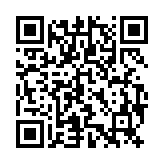

In [6]:
from IPython.display import Image
code=gen_code(mobile="0826639206", amount=1.23)#scb
print(code)
img = qrcode.make(code,box_size=4)
img.save('qr.png')
Image(filename='qr.png') 